# Rotation Gates
Let us see how the rotation gates look in action

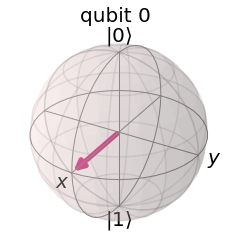

In [11]:
import numpy as np
from math import pi
from qiskit import QuantumCircuit, QuantumRegister, execute, Aer
from qiskit.tools.visualization import plot_histogram, plot_state_city
from qiskit import BasicAer
import warnings
warnings.filterwarnings('ignore')

# Initialize circuit
qr = QuantumRegister(1)
circuit = QuantumCircuit(qr)

# Apply gates
circuit.h(qr)

# Run circuit
backend_sv_sim = BasicAer.get_backend('statevector_simulator')
job_sim = execute(circuit, backend_sv_sim)
result_sim = job_sim.result()
quantum_state = result_sim.get_statevector(circuit, decimals=3)

# Plot the state vector on a Bloch sphere
from qiskit.tools.visualization import plot_bloch_multivector
plot_bloch_multivector(quantum_state)

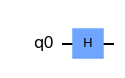

In [2]:
# Draw Circuit
circuit.draw(output="mpl")

In [3]:
from bloch_sphere.animate_bloch import do_or_save_animation, AnimState

@do_or_save_animation('my_animation', save=False, fps=30, preview=True)
# Or
#@do_or_save_animation('my_animation', save='gif', fps=20, preview=True)
#@do_or_save_animation('my_animation', save='mp4', fps=20, preview=False)
def animate(state: AnimState):
    state.x_gate()
    state.y_gate()
    state.z_gate()
    state.h_gate() 
    ...
    state.wait()  # Pause at the end

Traceback (most recent call last):
  File "<ipython-input-3-ddb3d9116a27>", line 1, in <module>
    from bloch_sphere.animate_bloch import do_or_save_animation, AnimState
ModuleNotFoundError: No module named 'bloch_sphere'

Use %tb to get the full traceback.


# The CNOT Gate
Implementation in Qiskit

In [ ]:
from qiskit import QuantumCircuit, execute, Aer, ClassicalRegister, QuantumRegister

# Define the circuit
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr,cr)

# Apply gates
circuit.ccx(qr[0],qr[1],qr[2])

# Measure and output
circuit.measure(qr,cr)
circuit.draw(output="mpl")

In [ ]:
job = execute(circ,Aer.get_backend('qasm_simulator'),shots=1024)
counts = job.result().get_counts(circ)
print(counts)
plot_historgram(counts)

# Controlled custom Gates
Implementation of any arbitary gate using to_gate() and control()


In [ ]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.circuit.library.standard_gates import HGate, IGate, RXGate

# Define custom gate
custom = HGate().control(4)

# Define quantum circuit
qc2 = QuantumCircuit(5)
qc2.append(custom, [0,2,3,1,4])
qc2.draw(output="mpl")

# Importing the Circuit Composer

In [ ]:
from ibm_quantum_widgets import CircuitComposer
editor = CircuitComposer()
editor

In [ ]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(3, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.x(qreg_q[1])
circuit.ccx(qreg_q[0], qreg_q[1], qreg_q[2])
circuit.h(qreg_q[0])
circuit.rx(pi/2, qreg_q[1])

# Backends
Short demo of backends and their resulting outputs. We shall use the circuit generated by the circuit composer to get the results

In [4]:
from ibm_quantum_widgets import CircuitComposer
editor2 = CircuitComposer()
editor2

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x7f28b1cecb50>)

In [37]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

In [8]:
# This code is being generated automatically by the IBM Quantum Circuit Composer widget.
# It changes in every update of the widget, so any modifications done in this cell will be lost.
# State: synchronized

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

qreg_q = QuantumRegister(2, 'q')
creg_c = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])

In [6]:
for backend in Aer.backends():
    print (backend.name())

Traceback (most recent call last):
  File "<ipython-input-6-7aa7dc9b5323>", line 1, in <module>
    for backend in Aer.backends():
NameError: name 'Aer' is not defined

Use %tb to get the full traceback.


In [31]:
# Define Backends
#backend1 = Aer.get_backend("qasm_simulator")
#backend2 = Aer.get_backend("statevector_simulator")
backend3 = Aer.get_backend("unitary_simulator")

In [32]:
# Define jobs
#job1 = execute(circuit, backend1, shots = 1024)
#job2 = execute(circuit, backend2)
job3 = execute(circuit, backend3)

In [33]:
# Define results
#result1 = job1.result()
#result2 = job2.result()
result3 = job3.result()

{'01': 246, '11': 268, '10': 264, '00': 246}


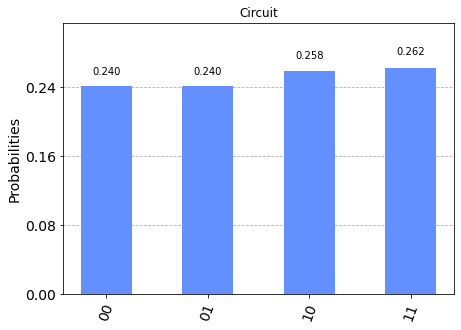

In [20]:
# Get outputs qasm
from qiskit.tools.visualization import plot_histogram
outcounts = result1.get_counts()
print(outcounts)
plot_histogram(outcounts, title="Circuit")

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j]


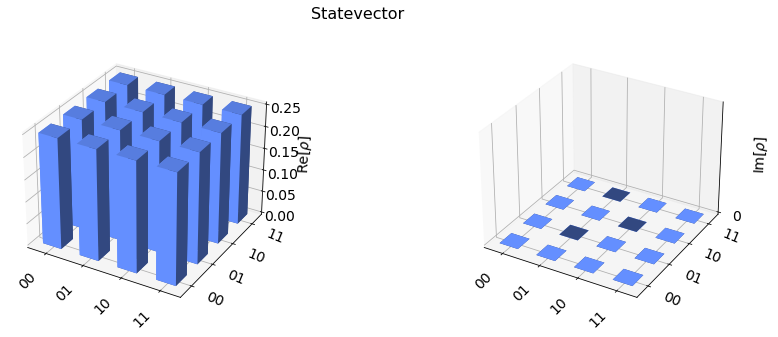

In [30]:
# Get output statevector
outstate = result2.get_statevector(circuit, decimals = 3)
print(outstate)

from qiskit.tools.visualization import plot_state_city
plot_state_city(outstate, title="Statevector")

In [36]:
# Get output unitary
outunitary = result3.get_unitary(circuit, decimals=3)
print("Circuit Unitary: \n ", outunitary)

Circuit Unitary: 
  [[ 0.5+0.j  0.5-0.j  0.5-0.j  0.5-0.j]
 [ 0.5+0.j -0.5+0.j  0.5-0.j -0.5+0.j]
 [ 0.5+0.j  0.5-0.j -0.5+0.j -0.5+0.j]
 [ 0.5+0.j -0.5+0.j -0.5+0.j  0.5-0.j]]


In [38]:
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# Set provider
provider = IBMQ.load_account()
provider = IBMQ.get_provider("ibm-q")

Running on current least busy device:  ibmq_manila
Job Status: job has successfully run


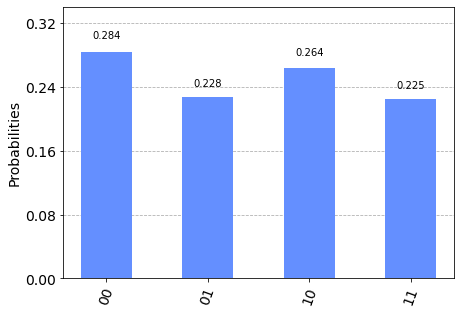

In [41]:
# Set device
device = least_busy(provider.backends(filters = lambda x: x.configuration().n_qubits >=2 and 
                                     not x.configuration().simulator and x.status().operational == True))
print("Running on current least busy device: ", device)

# Set provider
from qiskit.tools.monitor import job_monitor
transpiled = transpile(circuit, device, optimization_level=3)
job = device.run(transpiled, shots = 1024)
job_monitor(job, interval = 2)

results = job.result()
counts = results.get_counts(circuit)
plot_histogram(counts)